In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df = pd.read_csv('HospitalAdmissionsData.csv')
df.head()

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


In [12]:
df.shape

(58863, 10)

In [21]:
cols = df.columns
cols

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [22]:
df.dtypes


ID                       int64
AdmissionLengthDays    float64
Death_1                  int64
Admission_Type          object
Insurance_Type          object
EnglishLanguage_1        int64
Religion_Type           object
Married_1                int64
Race                    object
Dx                      object
dtype: object

In [30]:
df["Insurance_Type"].unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [31]:
df["AdmissionLengthDays"].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [99]:
df[["AdmissionLengthDays", "Insurance_Type", "Religion_Type", "Dx"]].mode()


,AdmissionLengthDays,Insurance_Type,Religion_Type,Dx
0,5.28125,medicare,catholic,newborn


Text(0.5, 1.05, 'Admission Length')

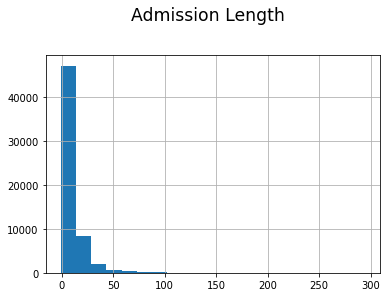

In [54]:
plot = df["AdmissionLengthDays"].hist(bins =20)
plot.set_xlabel("Number of days")
plot.set_ylabel("Hospital numbers")
plt.suptitle('Admission Length', x=0.5, y=1.05, ha='center', fontsize='xx-large')

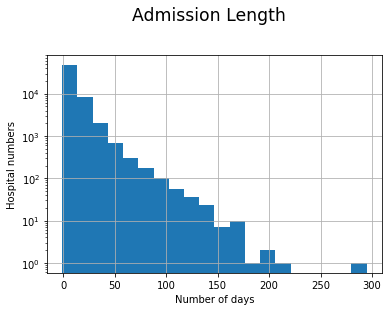

In [60]:
fig, ax = plt.subplots()
plot = df["AdmissionLengthDays"].hist(bins =20)
plot.set_xlabel("Number of days")
plot.set_ylabel("Hospital numbers")
plt.suptitle('Admission Length', x=0.5, y=1.05, ha='center', fontsize='xx-large')
ax.set_yscale('log')

In [61]:
# we do see that on a log scale, there exists a
# downwards negative relationship 

In [64]:
df.groupby("Death_1")["AdmissionLengthDays"].mean()

Death_1
0    10.140012
1    10.129606
Name: AdmissionLengthDays, dtype: float64

Death_1
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: AdmissionLengthDays, dtype: object

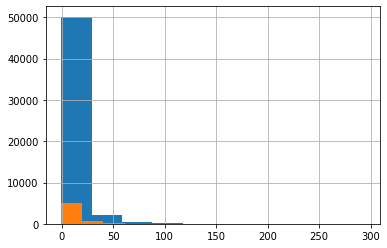

In [65]:
df.groupby("Death_1")["AdmissionLengthDays"].hist()
## we see that the oriange part being death number and
## blue part being survival numbers

In [68]:
df.groupby("Insurance_Type")["Death_1"].value_counts()

Insurance_Type  Death_1
government      0           1691
                1             90
medicaid        0           5400
                1            381
medicare        0          24253
                1           3904
private         0          21152
                1           1382
self pay        0            515
                1             95
Name: Death_1, dtype: int64

Text(0.5, 1.05, 'Admission Length')

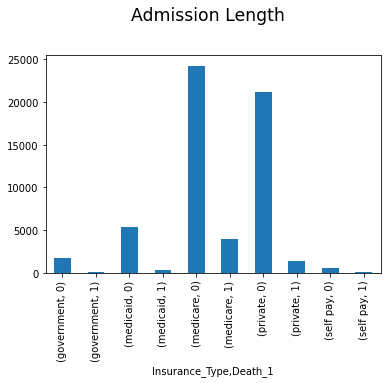

In [80]:
df.groupby("Insurance_Type")["Death_1"].value_counts().plot.bar()
plt.suptitle('Death vs insurance', x=0.5, y=1.05, ha='center', fontsize='xx-large')

In [118]:
# we do that a significant drop in death rate of people with 
# insurance, regardless of insurance types
df.groupby(["Insurance_Type", "Death_1"])["Death_1"].count()

## counts of each part also indicates great drop in death number
## for those with any type of insurance

Insurance_Type  Death_1
government      0           1691
                1             90
medicaid        0           5400
                1            381
medicare        0          24253
                1           3904
private         0          21152
                1           1382
self pay        0            515
                1             95
Name: Death_1, dtype: int64